<a href="https://colab.research.google.com/github/argxsL/CCADMACL_Exercises/blob/main/Exercise2B/Exercise2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 2B

Imagine you are a data scientist working for an international development organization. Your team wants to understand how countries differ in terms of economy, health, and social well-being. You have access to a dataset containing multiple indicators for countries worldwide, such as GDP per capita, life expectancy, child mortality, and population.

Your task is to discover natural groupings of countries using hierarchical clustering. By examining these clusters, you can identify patterns such as:

- Which countries are economically developed or developing

- How social and health indicators vary across regions

- Surprising similarities between countries from different continents

Answer each question by completing the corresponding code cell. **Do not remove or reorder cells.**



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/IMF_advanced_economies_and_UN_least_developed_countries.svg/960px-IMF_advanced_economies_and_UN_least_developed_countries.svg.png"/>

## Dataset feature description

 - child mort - Death of children under 5 years of age per 1000 live births

- exports - Exports of goods and services per capita. Given as %age of the GDP per capita
- health - Total health spending per capita. Given as %age of GDP per capita
- import - Imports of goods and services per capita. Given as %age of the GDP per capita
- income - Net income per person
- inflation - The measurement of the annual growth rate of the Total GDP
- life_expec - The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer - The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp - The GDP per capita. Calculated as the Total GDP divided by the total population.

child mort - sdg health // social wellbeing?

exports - income?

health -sdg health

import - income?

income - income?

inflation - income?

life_expec -sdg health

total_fer - sdg health // social wellbeing?

gdpp - income?

## 1. Import Required Libraries
Import the core libraries needed for data analysis, visualization, and clustering.

In [65]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


## 2. Load the Dataset
Upload the CSV file for *the* **Country Data** dataset.

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)


Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 3. Exploring the Dataset

Display the first 10 rows of the dataset `(5 pts)`

- Show the initial records to understand the dataset's structure and variables.

In [4]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [5]:
try:
    highest_each_category = df.loc[df.idxmax()]
    print("\nHighest in each category (groupby + idxmax):")
    print(highest_each_category)
except Exception as e:
    print(f"Error: {e}")


Highest in each category (groupby + idxmax):
           country  child_mort  exports  health  imports  income  inflation  \
166         Zambia        83.1     37.0    5.89     30.9    3280     14.000   
66           Haiti       208.0     15.3    6.91     64.7    1500      5.450   
133      Singapore         2.8    200.0    3.96    174.0   72100     -0.046   
159  United States         7.3     12.4   17.90     15.8   49400      1.220   
133      Singapore         2.8    200.0    3.96    174.0   72100     -0.046   
123          Qatar         9.0     62.3    1.81     23.8  125000      6.980   
113        Nigeria       130.0     25.3    5.07     17.4    5150    104.000   
77           Japan         3.2     15.0    9.49     13.6   35800     -1.900   
112          Niger       123.0     22.2    5.16     49.1     814      2.550   
91      Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   

     life_expec  total_fer    gdpp  
166        52.0       5.40    1460  
66        

Display the shape of the dataset `(5 pts)`
- How many rows (countries) and how many features does the dataset contain?

In [6]:
df.shape

(167, 10)

Show summary statistics using `describe()`. `(5 pts)`

In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Check for missing values. `(5 pts)`

In [8]:
df.isnull().any()

,0
country,False
child_mort,False
exports,False
health,False
imports,False
income,False
inflation,False
life_expec,False
total_fer,False
gdpp,False


## 4. Data Preprocessing

Select only the numerical columns for clustering `(5 pts)`
- Exclude any non-numeric fields, such as 'Country Name' or categorical variables.

In [11]:
df_countries = pd.DataFrame(df['country'])

In [36]:
df_num = df.drop(columns=['country'])

In [17]:
df_num.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Standardize the selected numerical features `(5 pts)`

- This ensures all features contribute equally to the distance calculations used in clustering.

In [98]:
df_num_scaled = StandardScaler().fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled, columns=df_num.columns)

In [20]:
df_fe = pd.DataFrame()
df_fe['health'] = (df_num['child_mort']/df_num['child_mort'].mean()) +(df_num['health']/df_num['health'].mean()) + (df_num['life_expec']/df_num['life_expec'].mean()) +(df_num['total_fer']/df_num['total_fer'].mean())
df_fe['trade'] = (df_num['exports']/df_num['exports'].mean()) + (df_num['imports']/df_num['imports'].mean())
df_fe['finance'] = (df_num['income']/df_num['income'].mean())+ (df_num['inflation']/df_num['inflation'].mean()) + (df_num['gdpp']/df_num['gdpp'].mean())

In [48]:
df_fe.head()

,health,trade,finance
0,6.239852,1.200812,1.349645
1,3.035901,1.717580,1.471658
2,3.389763,1.603752,3.165367
3,6.469020,2.430387,3.494919
4,2.964898,2.362940,2.240150


In [100]:
df_fe_scaled = StandardScaler().fit_transform(df_fe)
df_fe_scaled = pd.DataFrame(df_fe_scaled, columns=df_fe.columns)

## 5. Exploratory Data Analysis

Generate a correlation heatmap
- Visualize the relationships between socioeconomic indicators. `(10 pts)`

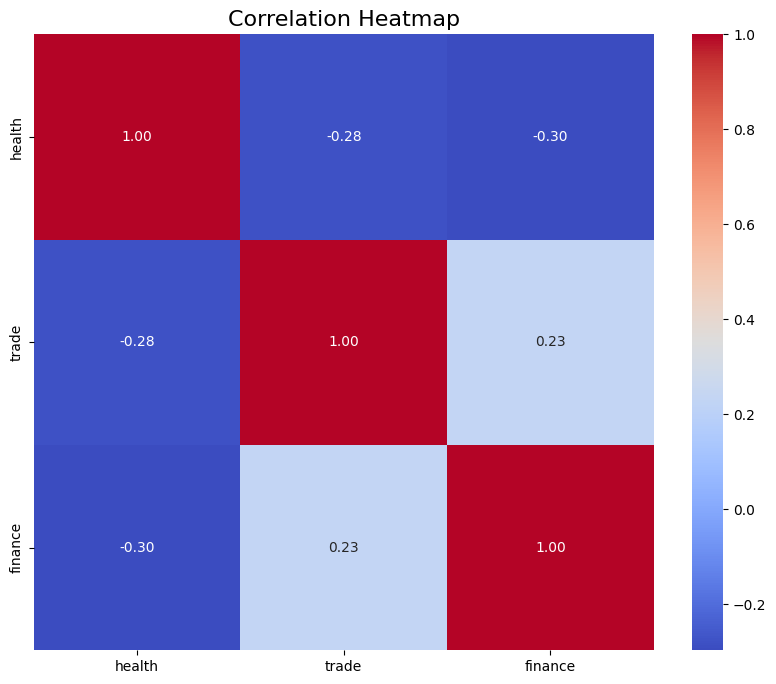

In [57]:
plt.figure(figsize=(10, 8))
df_heatmap = df_fe.corr()
sns.heatmap(df_heatmap, cmap='coolwarm', annot=True, fmt=".2f",)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

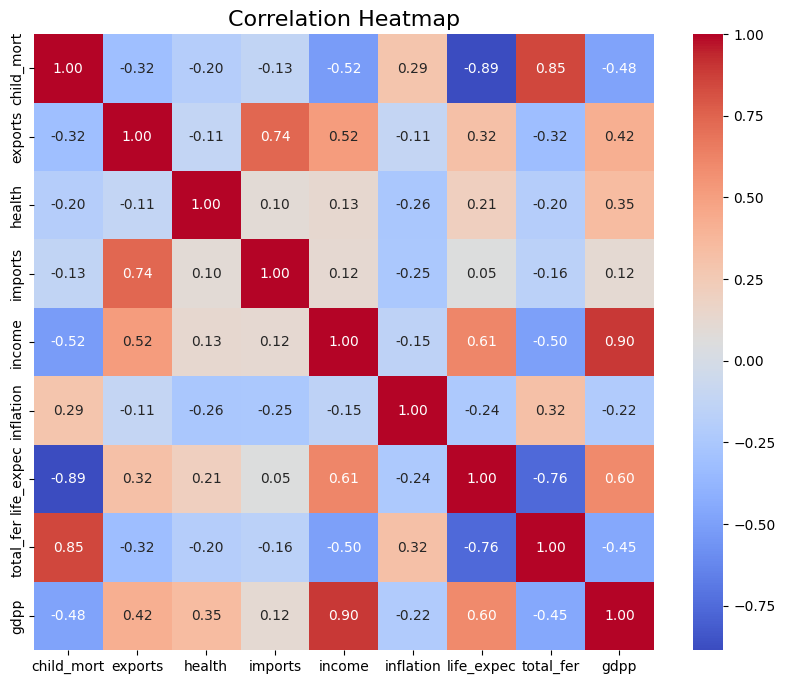

In [47]:
plt.figure(figsize=(10, 8))
df_heatmap = df_num_scaled.corr()
sns.heatmap(df_heatmap, cmap='coolwarm', annot=True, fmt=".2f",)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

Identify 2–3 variables that appear strongly correlated `(10 pts)`
- Explain your observations in the text cell below.

The top positive correlation seems to be'gdpp' and 'income' columns with 0.90 corr score, and the next is 'child_mort' and 'total_fer' with a 0.85 positive corr score. The first shows that a higher income population very likely results in a higher gdpp for the country, while the next shows that higher birth rates results in more children dying, as it is possible they are unable to support it.

Meanwhile top negative correlation is 'child_mort' and 'life_expec' with a -0.89 corr score, then 'life_expec' and 'total_fer', with a -0.76 corr score. The top score is somewhat expected as more of the population die at a younger age, the lower the life expectancy of the country is, while the correlation between life expectancy and fertility is a bit less, it goes to say that they are correlated as well showing that more births could lead to lower life expectancy. I think it is possible this is a correlation as a result of child mortality between the two.


## 6. Hierarchical Clustering

Compute and display a dendrogram using the linkage method `(10 pts)`
- Use `'ward'` linkage to minimize variance within clusters.

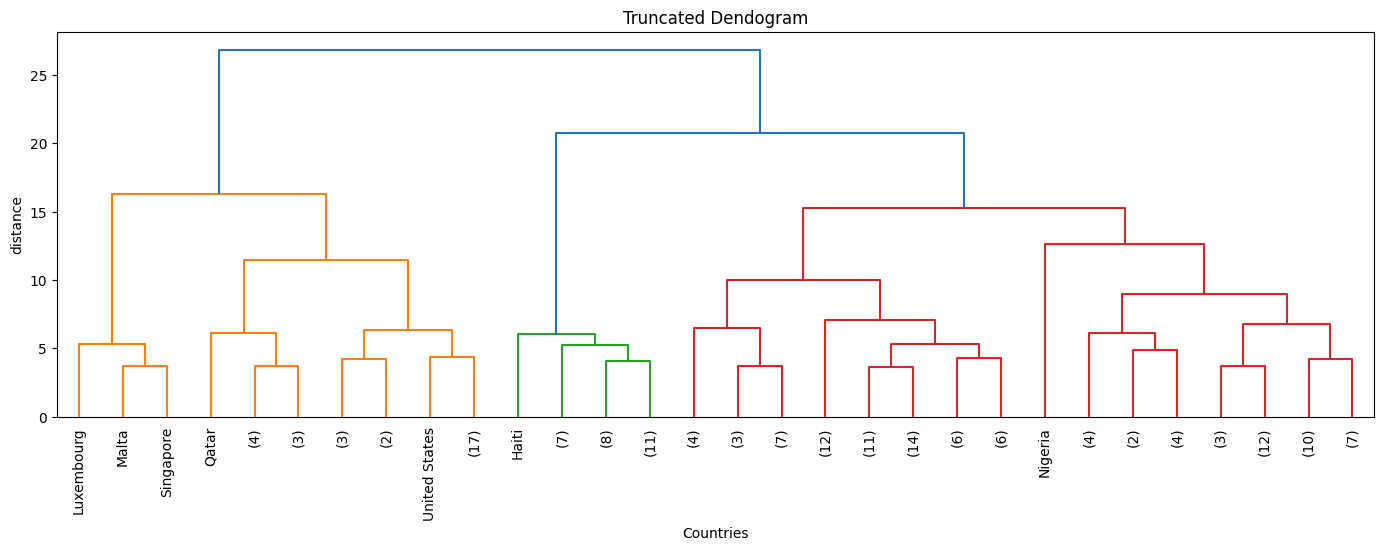

In [93]:
# Perform hierarchical clustering
Z = linkage(df_num_scaled, method = 'ward')

# Create a dendrogram
plt.figure(figsize=(17,5))
dn = dendrogram(Z, labels=df['country'].values, truncate_mode="lastp" , leaf_rotation=90)
plt.xlabel('Countries')
plt.title('Truncated Dendogram')
plt.ylabel('distance')
plt.show()

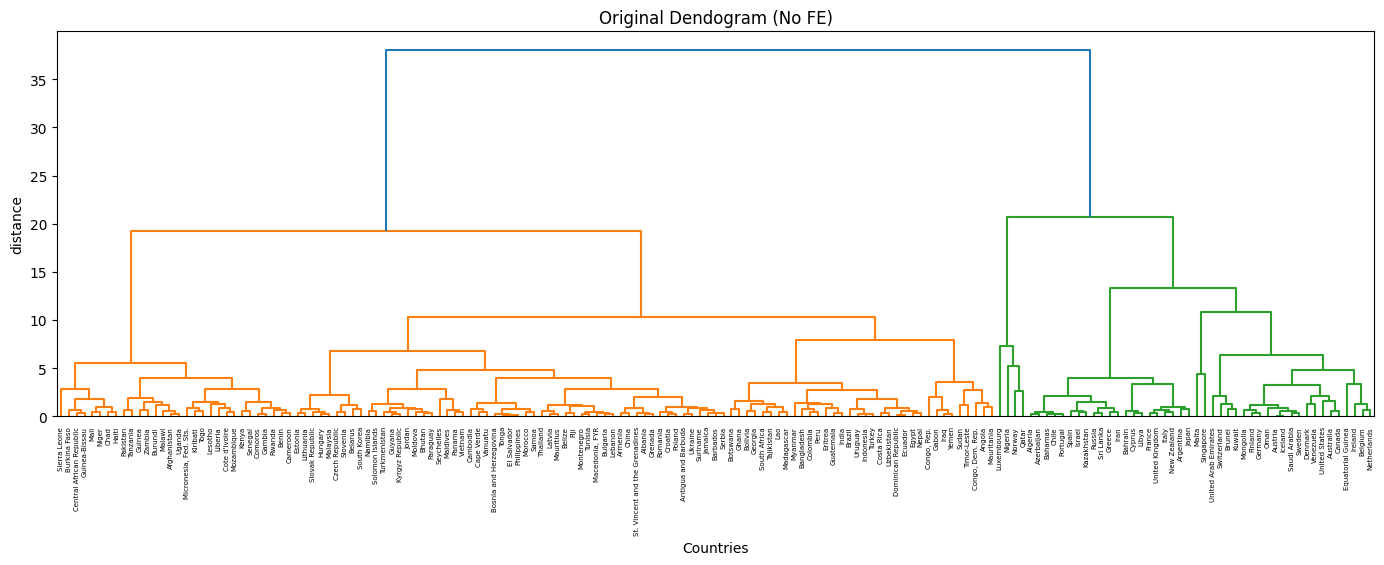

In [60]:
# Perform hierarchical clustering
Z = linkage(df_fe, method = 'ward')

# Create a dendrogram
plt.figure(figsize=(17,5))
dn = dendrogram(Z, labels=df['country'].values, leaf_rotation=90)
plt.xlabel('Countries')
plt.title('Original Dendogram (No FE)')
plt.ylabel('distance')
plt.show()

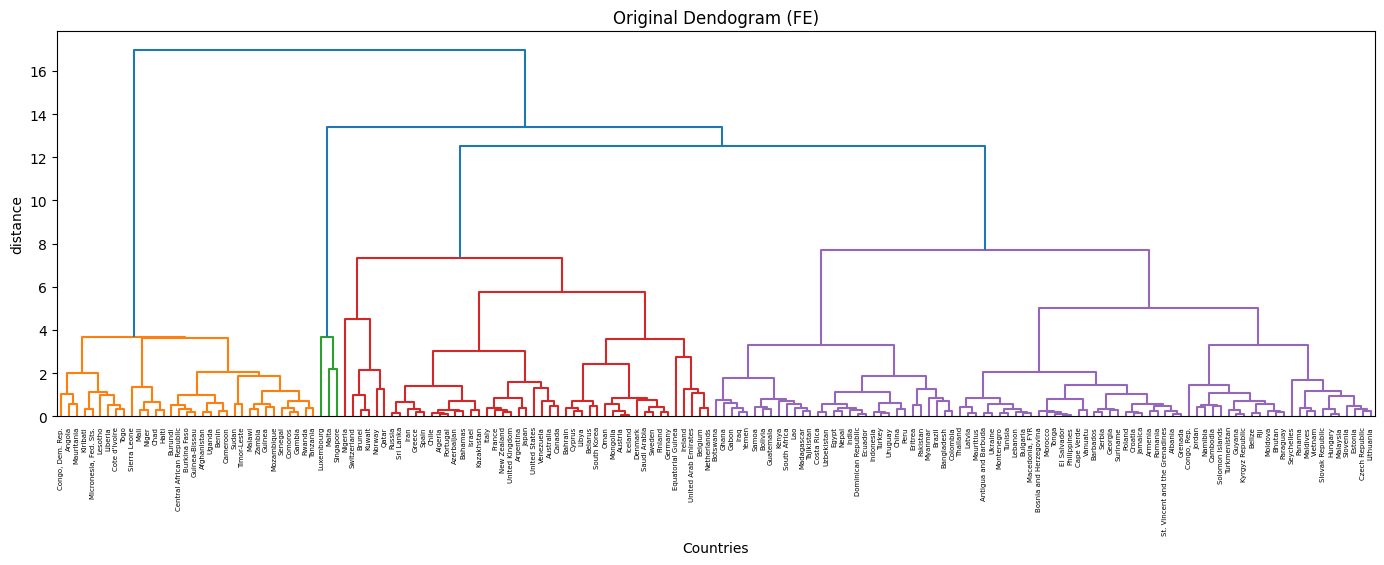

In [63]:
# Perform hierarchical clustering
Z = linkage(df_fe_scaled, method = 'ward')

# Create a dendrogram
plt.figure(figsize=(17,5))
dn = dendrogram(Z, labels=df['country'].values, leaf_rotation=90)
plt.xlabel('Countries')
plt.title('Original Dendogram (FE)')
plt.ylabel('distance')
plt.show()

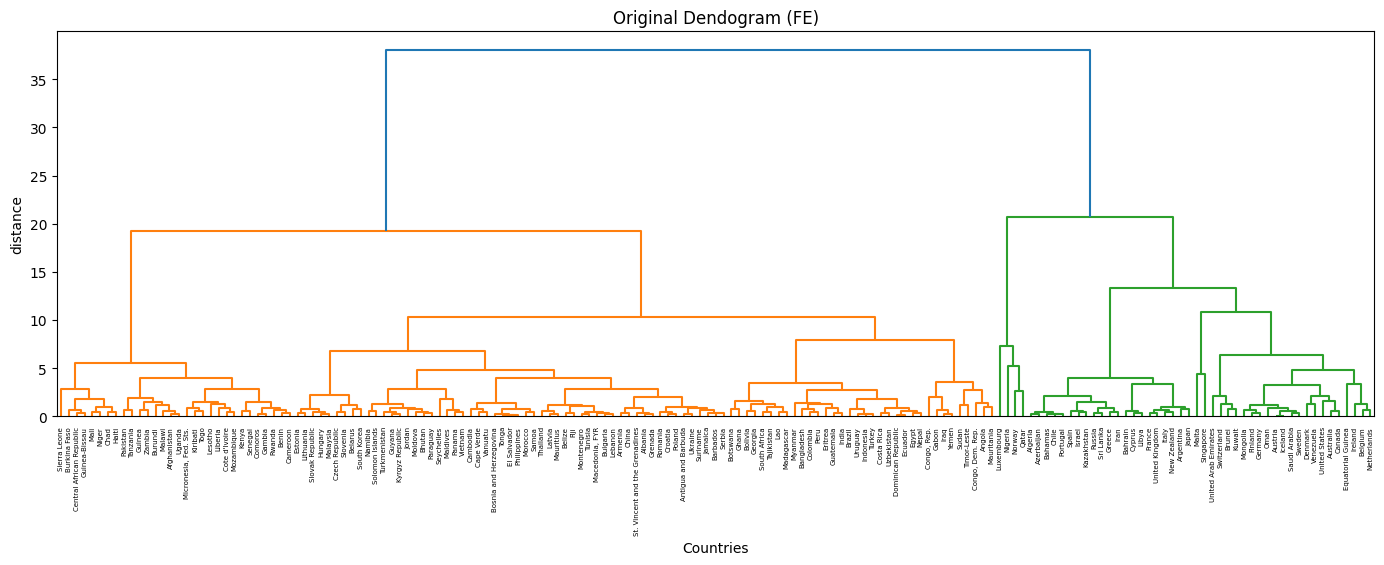

In [56]:
# Perform hierarchical clustering
Z = linkage(df_fe, method = 'ward')

# Create a dendrogram
plt.figure(figsize=(17,5))
dn = dendrogram(Z, labels=df['country'].values, leaf_rotation=90)
plt.xlabel('Countries')
plt.title('Original Dendogram (FE)')
plt.ylabel('distance')
plt.show()

In [104]:
fig = px.scatter_3d(df_fe_scaled, x='trade', y='health', z='finance')
fig.show()

Based on the dendrogram, choose a reasonable number of clusters `(5 pts)`
- Write your chosen number below and explain your reasoning.

ANSWER: Based on the dendrogram, there should be 2 main clusters that show up, but based on the scatterplot I think there should  be 3.

*   The cluster in the which are countries that have high development and have high scores in finance, trade, and health.
*   The cluster in which are countries that have lower scores in all finance, trade, and health.
*   The cluster in which are have low scores in finance and trade but have generally better scores in health.



Perform Agglomerative Clustering using your chosen cluster count `(10 pts)`
- Attach the cluster labels back to the original dataframe.

In [101]:
# cluster with no feature engineering
cluster_3= AgglomerativeClustering(n_clusters=3,linkage='ward')
# Model Fit
model_3 = cluster_3.fit(df_fe_scaled)
print(model_3)
print('\n')

df_fe_scaled['clusters'] = model_3.labels_
print('Clusters assigned to each datapoints, cluster = 3 :')
print(df_fe_scaled['clusters'])

AgglomerativeClustering(n_clusters=3)


Clusters assigned to each datapoints, cluster = 3 :
0      2
1      1
2      0
3      2
4      1
      ..
162    1
163    0
164    1
165    1
166    2
Name: clusters, Length: 167, dtype: int64


In [88]:
print(df_fe['clusters'].unique())

[1 0 2]


## 7. Visualizing Cluster Results

Create a scatter plot using any 2 meaningful features, colored by cluster `(10 pts)`
- Choose variables that make socioeconomic sense (e.g., GDP per capita vs. life expectancy).

In [103]:
fig = px.scatter_3d(df_fe_scaled, x='trade', y='health', z='finance',color='clusters')
fig.show()

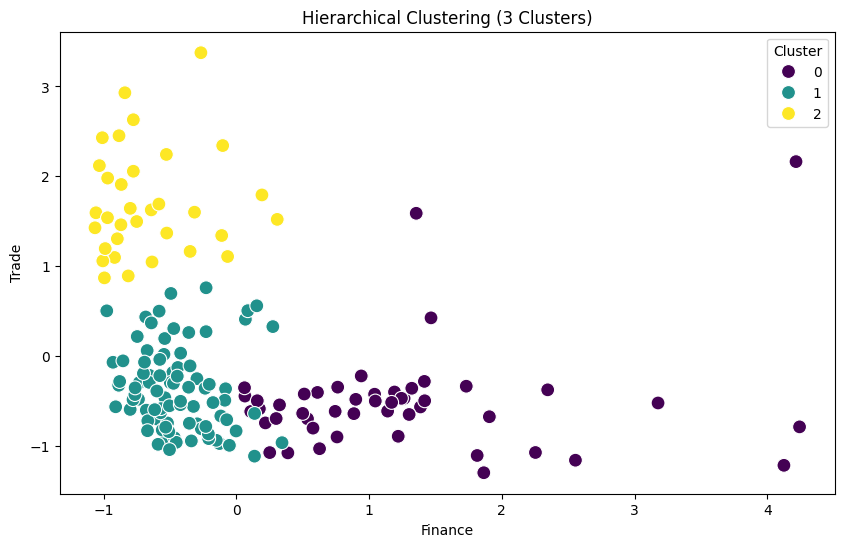

In [102]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_fe_scaled, x ='finance', y='health', hue='clusters', palette='viridis',s=100)
plt.title("Hierarchical Clustering (3 Clusters)")
plt.xlabel("Finance")
plt.ylabel("Trade")
plt.legend(title='Cluster')
plt.show()

Describe the characteristics of each cluster `(5 pts)`
- What patterns can you infer about country groupings?

There is a pattern of 3 groups, with dark blue (cluster 0) having the positive in all three scores.
With maroon (cluster 1) having generally having lower scores on all columns and yellow (cluster 2) faring better by having good health but lower scores in finance and trade.

## 8. Reflection
Write a short reflection on what socioeconomic insights hierarchical clustering revealed about global development patterns. `(10 pts)`


I learned that income is not the only indicator of good living conditions in countries. Some countries like in cluster 2 have generally bad trade and finance scores but still have really good health scores, showing they are developing but still focus on the average citizen's wellbeing.